# Ejercicio 11

Utilizando los datos en "fitting.txt" calcule la evidencia bayesiana para M modelos diferentes, donde cada modelo es un polinomio de orden m. Prepare una grafica de la evidencia como funcion del orden del polinomio. El prior para los coeficientes del polinomio debe ser uniforme entre -1 y 1, y el orden de los polinomios debe variar entre 0<=m<=20.

In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
data = pd.read_csv("fitting.txt",sep=" ")

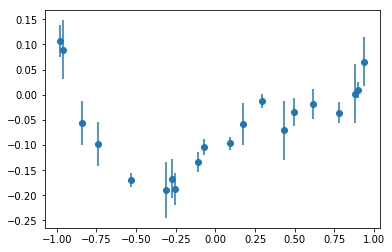

In [4]:
data = pd.read_csv("fitting.txt",sep=" ")
X=np.array(data["x"])
Y=np.array(data["y"])
sigma=np.array(data["sigma_y"])
plt.errorbar(X, Y, yerr=sigma, fmt='o')
plt.show()

In [5]:
def model(x_datos,param):
    y=x_datos.copy()
    y[:]=0
    for i in range(len(param)):
        y += param[i]*x_datos**(i)
    return y
def logprior(param):
    for i in range(len(param)):
        if np.abs(param[i])<1:
            p = 0.0
        else:        
            p = -np.inf
    return p
def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    d = y_obs -  model(x_obs,param)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

In [6]:
N=100000
x_obs = X
y_obs = Y
sigma_y = sigma
Orden_max=20
verosimilitud=np.array([0.0]*Orden_max)
grados=np.array([0.0]*Orden_max)

for orden in range(Orden_max):
    # print("-------",orden)
    test=0
    for i in range(N):
        param=np.random.uniform(-1,1,size=orden+1)
        test+=np.exp(loglikelihood(x_obs, y_obs,sigma_y, param) - (len(x_obs)/2.0)*(np.log(2.0*np.pi))-((1)/2.0)*sum(np.log(sigma_y)))
    verosimilitud[orden]=test/N
    grados[orden]=orden+1